In [1]:
import warnings
warnings.filterwarnings('ignore')

데이터 획득

In [3]:
import pandas as pd
df = pd.read_csv('./data/basketball_stat.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

데이터 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

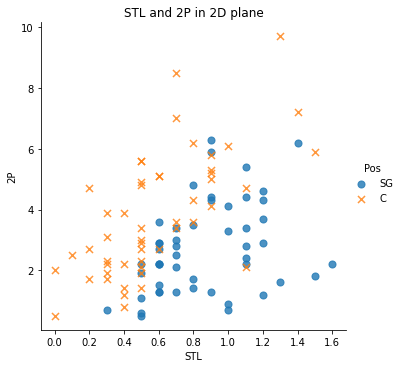

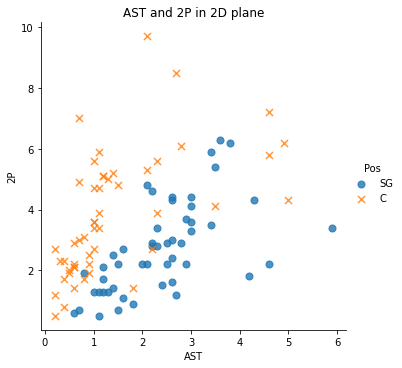

In [11]:
# seaborn 라이브러리의 lmplot() 함수로 스틸과 2점슛, 어시스트와 2점슛의 포지션(Pos) 별 분포도를 출력한다.
sns.lmplot(data=df, x='STL', y='2P', fit_reg=False, # 데이터, x축, y축, 회귀선 표시 여부
           scatter_kws={'s' : 50}, # 그래프에 표시되는 표식의 크기
           hue='Pos', # 그래프에 표시될 범례별 색상
           markers=['o', 'x'] #hue에 따른 표식의 종류
          )
plt.title('STL and 2P in 2D plane')
sns.lmplot(data=df, x='AST', y='2P', fit_reg=False, scatter_kws={'s' : 50}, hue='Pos', markers=['o', 'x'])
plt.title('AST and 2P in 2D plane')
plt.show()
# 그래프에서 나오는 선 = 회귀선

Text(0.5, 1.0, 'TRB and 3P in 3D plane')

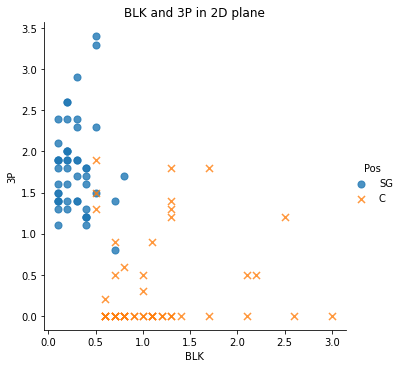

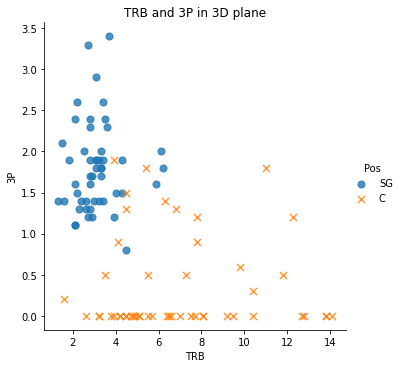

In [12]:
# seaborn 라이브러리의 lmplot() 함수로 블로킹과 3점슛, 리바운드와 3점슛의 포지션(Pos) 별 분포표를 출력한다.
sns.lmplot(data=df, x='BLK', y='3P', fit_reg=False, scatter_kws={'s' : 50}, hue='Pos', markers=['o', 'x'])
plt.title('BLK and 3P in 2D plane')

sns.lmplot(data=df, x='TRB', y='3P', fit_reg=False, scatter_kws={'s' : 50}, hue='Pos', markers=['o', 'x'])
plt.title('TRB and 3P in 3D plane')

데이터 다듬기

In [13]:
# 판다스의 drop() 함수로 불필요한 컬럼 전체를 삭제할 수 있다.
# axis 속성은 생략시 0이 기본값이며 행을 삭제하고 1을 쓰면 열을 삭제한다.
# inplace 속성은 False가 기본값이며 함수가 실행된 결과를 데이터에 반영하지 않고 True를 쓰면 실행된 결과를 데이터에 반영한다.
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


데이터 나누기

In [14]:
# 학습 데이터와 테스트 데이터로 데이터를 분리하기 위해
# sklearn의 train_test_split() 함수를 import한다.
from sklearn.model_selection import train_test_split

In [15]:
# 데이터의 80%를 학습용 데이터로 사용하고 데이터의 20%를 테스트 데이터로 분리한다.
train, test = train_test_split(df, train_size=0.8, test_size=0.2)
print(train.shape[0])
print(test.shape[0])

80
20
